In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])

    i=0
    for index,cluster in tqdm(clusters.iterrows()):
        ng_list[(i),:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
        i=i+1
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

23it [00:00, 223.33it/s]

39it [00:00, 198.80it/s]

62it [00:00, 183.80it/s]

79it [00:00, 177.12it/s]

100it [00:00, 185.55it/s]

119it [00:00, 186.81it/s]

142it [00:00, 197.18it/s]

161it [00:00, 193.12it/s]

181it [00:00, 193.75it/s]

205it [00:01, 202.57it/s]

233it [00:01, 216.07it/s]

255it [00:01, 199.63it/s]

276it [00:01, 195.01it/s]

296it [00:01, 167.86it/s]

314it [00:01, 164.42it/s]

332it [00:01, 159.59it/s]

349it [00:01, 159.24it/s]

366it [00:02, 158.39it/s]

388it [00:02, 171.22it/s]

407it [00:02, 174.03it/s]

425it [00:02, 169.46it/s]

448it [00:02, 180.92it/s]

467it [00:02, 178.79it/s]

486it [00:02, 181.60it/s]

507it [00:02, 189.01it/s]

527it [00:02, 177.75it/s]

546it [00:03, 170.39it/s]

564it [00:03, 156.41it/s]

581it [00:03, 157.01it/s]

598it [00:03, 159.84it/s]

615it [00:03, 155.49it/s]

631it [00:03, 149.64it/s]

648it [00:03, 153.86it/s]

670it [00:03, 168.57it/s]

689it [00:03, 173.32it/s]

707it [00:04, 174.89it/s]

729it [00:04, 182.84it/s]

750it [00:04, 188.54it/s]

773it [00:04, 198.15it/s]

795it [00:04, 201.59it/s]

817it [00:04, 205.48it/s]

839it [00:04, 208.81it/s]

861it [00:04, 209.42it/s]

885it [00:04, 216.27it/s]

907it [00:04, 212.77it/s]

929it [00:05, 199.62it/s]

950it [00:05, 195.27it/s]

970it [00:05, 176.67it/s]

989it [00:05, 161.19it/s]

1009it [00:05, 169.13it/s]

1034it [00:05, 183.69it/s]

1063it [00:05, 204.93it/s]

1091it [00:05, 221.85it/s]

1123it [00:05, 243.49it/s]

1149it [00:06, 235.37it/s]

1177it [00:06, 244.38it/s]

1203it [00:06, 238.91it/s]

1228it [00:06, 233.86it/s]

1252it [00:06, 235.62it/s]

1276it [00:06, 233.77it/s]

1300it [00:06, 229.37it/s]

1324it [00:06, 214.70it/s]

1346it [00:07, 198.00it/s]

1367it [00:07, 197.86it/s]

1388it [00:07, 183.12it/s]

1409it [00:07, 189.73it/s]

1429it [00:07, 188.37it/s]

1449it [00:07, 175.72it/s]

1469it [00:07, 181.23it/s]

1493it [00:07, 194.32it/s]

1513it [00:07, 183.80it/s]

1534it [00:08, 190.51it/s]

1554it [00:08, 178.17it/s]

1573it [00:08, 174.67it/s]

1592it [00:08, 178.26it/s]

1611it [00:08, 165.94it/s]

1630it [00:08, 171.28it/s]

1648it [00:08, 158.19it/s]

1671it [00:08, 171.61it/s]

1702it [00:08, 197.70it/s]

1734it [00:09, 221.95it/s]

1765it [00:09, 241.53it/s]

1792it [00:09, 236.23it/s]

1825it [00:09, 258.11it/s]

1858it [00:09, 275.51it/s]

1888it [00:09, 262.01it/s]

1917it [00:09, 268.93it/s]

1949it [00:09, 281.45it/s]

1978it [00:09, 224.41it/s]

2003it [00:10, 163.36it/s]

2035it [00:10, 191.35it/s]

2059it [00:10, 202.93it/s]

2093it [00:10, 230.22it/s]

2120it [00:10, 240.05it/s]

2148it [00:10, 250.39it/s]

2176it [00:10, 233.56it/s]

2207it [00:10, 250.74it/s]

2242it [00:11, 273.50it/s]

2272it [00:11, 275.55it/s]

2304it [00:11, 285.54it/s]

2335it [00:11, 290.35it/s]

2371it [00:11, 306.39it/s]

2403it [00:11, 297.28it/s]

2435it [00:11, 303.14it/s]

2469it [00:11, 311.47it/s]

2501it [00:11, 286.37it/s]

2531it [00:12, 279.94it/s]

2560it [00:12, 257.33it/s]

2590it [00:12, 265.76it/s]

2618it [00:12, 260.09it/s]

2645it [00:12, 238.54it/s]

2676it [00:12, 255.65it/s]

2705it [00:12, 263.23it/s]

2738it [00:12, 278.59it/s]

2769it [00:12, 286.96it/s]

2799it [00:13, 281.29it/s]

2828it [00:13, 268.09it/s]

2856it [00:13, 263.65it/s]

2890it [00:13, 282.25it/s]

2919it [00:13, 254.92it/s]

2946it [00:13, 222.58it/s]

2977it [00:13, 241.64it/s]

3004it [00:13, 247.49it/s]

3034it [00:13, 260.51it/s]

3061it [00:14, 248.08it/s]

3091it [00:14, 256.73it/s]

3118it [00:14, 242.49it/s]

3143it [00:14, 237.22it/s]

3168it [00:14, 237.74it/s]

3193it [00:14, 236.54it/s]

3217it [00:14, 233.75it/s]

3247it [00:14, 248.87it/s]

3277it [00:14, 261.36it/s]

3307it [00:15, 271.48it/s]

3341it [00:15, 287.90it/s]

3371it [00:15, 253.01it/s]

3406it [00:15, 270.96it/s]

3435it [00:15, 271.70it/s]

3468it [00:15, 285.53it/s]

3499it [00:15, 291.32it/s]

3529it [00:15, 289.14it/s]

3559it [00:15, 286.42it/s]

3590it [00:16, 292.79it/s]

3620it [00:16, 294.86it/s]

3650it [00:16, 288.95it/s]

3680it [00:16, 255.41it/s]

3707it [00:16, 247.13it/s]

3733it [00:16, 236.99it/s]

3761it [00:16, 244.27it/s]

3769it [00:16, 224.38it/s]


0it [00:00, ?it/s]

30it [00:00, 295.65it/s]

66it [00:00, 311.44it/s]

103it [00:00, 325.02it/s]

132it [00:00, 312.42it/s]

167it [00:00, 320.56it/s]

202it [00:00, 327.31it/s]

236it [00:00, 327.99it/s]

271it [00:00, 333.37it/s]

305it [00:00, 334.62it/s]

338it [00:01, 315.59it/s]

370it [00:01, 286.44it/s]

402it [00:01, 294.85it/s]

437it [00:01, 309.10it/s]

471it [00:01, 315.66it/s]

503it [00:01, 303.34it/s]

534it [00:01, 301.02it/s]

565it [00:01, 285.01it/s]

602it [00:01, 304.61it/s]

635it [00:02, 311.58it/s]

671it [00:02, 323.56it/s]

704it [00:02, 302.97it/s]

735it [00:02, 293.89it/s]

767it [00:02, 300.16it/s]

798it [00:02, 288.68it/s]

828it [00:02, 259.12it/s]

858it [00:02, 268.80it/s]

891it [00:02, 278.21it/s]

920it [00:03, 277.12it/s]

949it [00:03, 267.61it/s]

980it [00:03, 277.65it/s]

1017it [00:03, 299.59it/s]

1053it [00:03, 313.33it/s]

1089it [00:03, 325.91it/s]

1123it [00:03, 322.10it/s]

1160it [00:03, 333.63it/s]

1194it [00:03, 318.89it/s]

1231it [00:03, 331.76it/s]

1268it [00:04, 342.05it/s]

1303it [00:04, 330.24it/s]

1340it [00:04, 339.48it/s]

1375it [00:04, 301.74it/s]

1407it [00:04, 305.71it/s]

1439it [00:04, 301.22it/s]

1476it [00:04, 317.25it/s]

1509it [00:04, 315.30it/s]

1541it [00:04, 309.48it/s]

1574it [00:05, 314.74it/s]

1606it [00:05, 289.21it/s]

1636it [00:05, 257.72it/s]

1672it [00:05, 280.31it/s]

1703it [00:05, 288.34it/s]

1738it [00:05, 303.91it/s]

1774it [00:05, 317.99it/s]

1809it [00:05, 326.72it/s]

1843it [00:05, 326.51it/s]

1877it [00:06, 318.97it/s]

1910it [00:06, 285.52it/s]

1946it [00:06, 303.51it/s]

1981it [00:06, 315.28it/s]

2018it [00:06, 328.03it/s]

2052it [00:06, 266.35it/s]

2083it [00:06, 271.38it/s]

2112it [00:06, 270.98it/s]

2141it [00:07, 265.11it/s]

2176it [00:07, 285.57it/s]

2212it [00:07, 304.21it/s]

2249it [00:07, 319.43it/s]

2282it [00:07, 315.54it/s]

2315it [00:07, 316.46it/s]

2350it [00:07, 324.68it/s]

2387it [00:07, 332.92it/s]

2421it [00:07, 329.35it/s]

2456it [00:07, 334.34it/s]

2490it [00:08, 320.82it/s]

2523it [00:08, 321.32it/s]

2556it [00:08, 301.52it/s]

2587it [00:08, 266.17it/s]

2620it [00:08, 281.62it/s]

2651it [00:08, 287.43it/s]

2683it [00:08, 296.26it/s]

2714it [00:08, 252.59it/s]

2741it [00:09, 254.42it/s]

2779it [00:09, 282.30it/s]

2813it [00:09, 296.52it/s]

2845it [00:09, 279.67it/s]

2880it [00:09, 294.54it/s]

2911it [00:09, 281.16it/s]

2940it [00:09, 276.59it/s]

2969it [00:09, 277.67it/s]

2998it [00:09, 281.09it/s]

3030it [00:10, 289.50it/s]

3062it [00:10, 297.02it/s]

3097it [00:10, 309.00it/s]

3132it [00:10, 318.70it/s]

3167it [00:10, 325.94it/s]

3200it [00:10, 326.33it/s]

3233it [00:10, 322.20it/s]

3267it [00:10, 325.65it/s]

3301it [00:10, 321.19it/s]

3335it [00:10, 325.20it/s]

3372it [00:11, 335.84it/s]

3408it [00:11, 335.38it/s]

3442it [00:11, 298.09it/s]

3473it [00:11, 272.59it/s]

3508it [00:11, 289.65it/s]

3538it [00:11, 274.74it/s]

3574it [00:11, 294.87it/s]

3607it [00:11, 302.72it/s]

3644it [00:11, 319.27it/s]

3678it [00:12, 324.49it/s]

3712it [00:12, 290.50it/s]

3744it [00:12, 298.69it/s]

3769it [00:12, 304.52it/s]

In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_ylim(-0.020,0.020)
    plt.show()
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

# Abs Plots

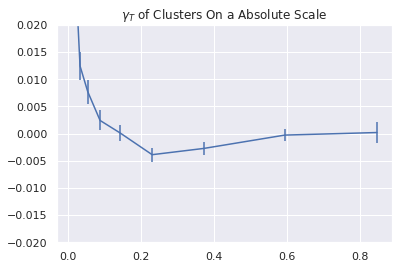

[-30.3899 -42.7478 -28.3401 -28.8934 -14.8435  -1.0505  56.7242  53.2142
   5.7698  -1.2581]
------------------------------------------------------------------------------
[ -2936.8047  -5563.4936  -7719.8638 -10879.993  -14893.7228 -19165.0484
 -21385.7942 -19212.5842 -10788.648   -1082.0708]
------------------------------------------------------------------------------
[  679.  1444.  2278.  3749.  6147.  9882. 14611. 19467. 20772.  6531.]
------------------------------------------------------------------------------
[-0.0448 -0.0296 -0.0124 -0.0077 -0.0024 -0.0001  0.0039  0.0027  0.0003
 -0.0002]
------------------------------------------------------------------------------
[-4.3252 -3.8528 -3.3889 -2.9021 -2.4229 -1.9394 -1.4637 -0.9869 -0.5194
 -0.1657]
------------------------------------------------------------------------------


In [19]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_T$ of Clusters On a Absolute Scale ")
for data  in sum_abs:
    print(data)
    print(sep)
for data in mean_abs:
    print(data)
    print(sep)

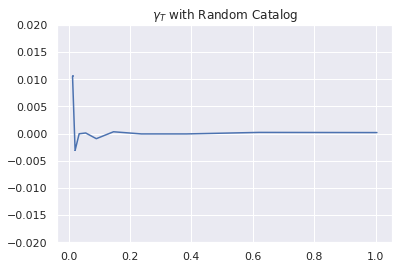

[ 1.0530e-02 -3.0813e-03 -3.2829e-05  1.0766e-04 -9.3823e-04  3.3370e-04
 -6.2208e-05 -6.3558e-05  2.1622e-04  1.8498e-04]
[-1.7151e-04  5.0191e-05  5.3475e-07 -1.7537e-06  1.5283e-05 -5.4356e-06
  1.0133e-06  1.0353e-06 -3.5220e-06 -3.0130e-06]


In [20]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_T$ with Random Catalog")
print(-r_xi)
print(r_sigma)

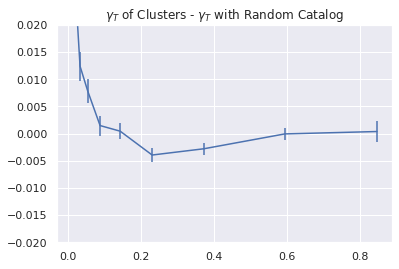

In [21]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_T$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

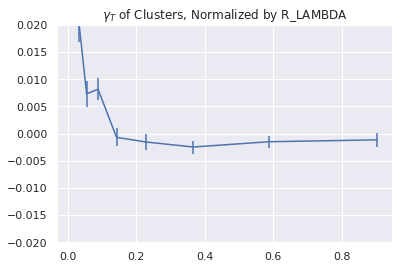

[-19.15   -39.3065 -37.1948 -21.3965 -39.0464   5.3848  18.8124  42.2339
  31.6305  19.1888]
------------------------------------------------------------------------------
[ -1607.5883  -3846.3817  -6411.3704  -8511.6732 -11610.8687 -15219.4001
 -17895.9132 -17140.5786 -11236.8978  -1688.9721]
------------------------------------------------------------------------------
[  374.   997.  1889.  2929.  4780.  7802. 12127. 17083. 21095. 16587.]
------------------------------------------------------------------------------
[-0.0512 -0.0394 -0.0197 -0.0073 -0.0082  0.0007  0.0016  0.0025  0.0015
  0.0012]
------------------------------------------------------------------------------
[-4.2984 -3.858  -3.3941 -2.906  -2.4291 -1.9507 -1.4757 -1.0034 -0.5327
 -0.1018]
------------------------------------------------------------------------------


In [22]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA")
for data  in sum_rel:
    print(data)
    print(sep)
for data in mean_rel:
    print(data)
    print(sep)